# Linear Regression with Python Scikit Learn#
### Submitted by Akshaya Dinesh
                                                           

### Problem statement:### 

Simple linear regression task as it involves just 2 variables.In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
Our task is to find What will be predicted score if a student studies for 9.25 hrs/ day?

### Data Overview:###

Data is provided from here: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv .
Data consist of two columns namely Hours and Score.

###  Reading and understanding of data ###

In [15]:
# first we have to imort all the libraries needed for this task

## Supress Warnings

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np 

## data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


In [5]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# Data inspection
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# Checking Null values
#Data cleaning
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Hours     0.0
Scores    0.0
dtype: float64

## Exploratory Data Analysis##

### 2D scatter plot###

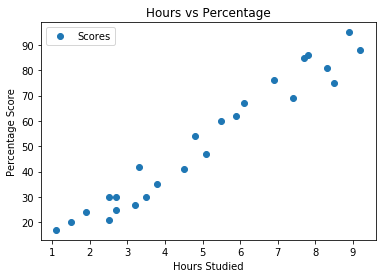

In [13]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and  score.

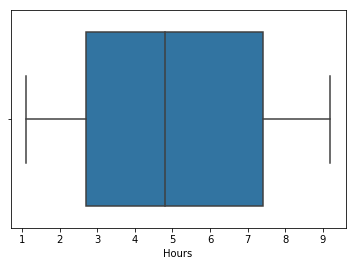

In [20]:
# Box plot
sns.boxplot(data['Hours'])
plt.show()

* Here we can see that the minimum value of 'Hours' is 1hr.
* First quartile is 2.7 hrs.
* Median of the box plot is about 4.8 hrs.
* Third quartile is about 7.8.
* The maximum hours is 9 and no outlier is observed

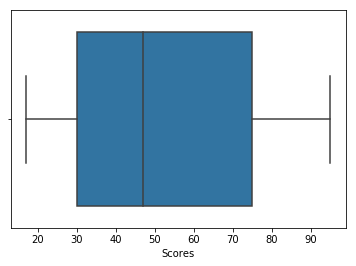

In [18]:
sns.boxplot(data['Scores'])
plt.show()

* Here we can see that the minimum value of 'Score' is 17.
* First quartile is 30.
* Median of the box plot is about 47.
* Third quartile is about 76.
* The maximum score is 95 and no outlier is observed

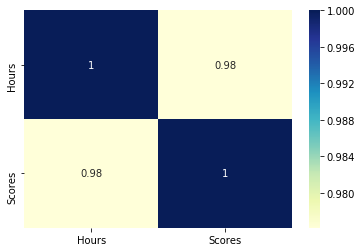

In [57]:
# Let's see the correlation between  variable.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Model Building###

### Simple Linear Regression### 

  Simple linear regression allows us to study the correlation between only two variables:

* One variable (X) is called independent variable or predictor.
* The other variable (Y), is known as dependent variable or outcome.
  and the simple linear regression equation is:

  Y = Β0 + Β1X

  Where:

*  X – the value of the independent variable,
*   Y – the value of the dependent variable.
*   Β0 – is a constant (shows the value of Y when the value of X=0)
*  Β1 – the regression coefficient (shows how much Y changes for each unit change in X)

#### Preparing the data#### 

* Divide the data into "attributes" and "labels". 
* Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
* In our dataset we only have two columns.
* We want to predict the percentage score depending upon the hours studied.
* Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

In [28]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [47]:
# TRAIN TEST SPLIT
# split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training the algorithm 

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# to find intercept
print(regressor.intercept_)

2.018160041434683


In [50]:
# slope 
print(regressor.coef_)

[9.91065648]


* This means that for every one unit of change in hours studied, the change in the score is about 9.91%.
* Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

### Making predictions

In [51]:
#  Now that we have trained our algorithm, it's time to make some predictions. To do so, 
 # we will use our test data and see how accurately our algorithm predicts the percentage score.
    
y_pred = regressor.predict(X_test)

In [52]:
# to compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# model is not very precise, the predicted percentages are close to the actual one

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [56]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


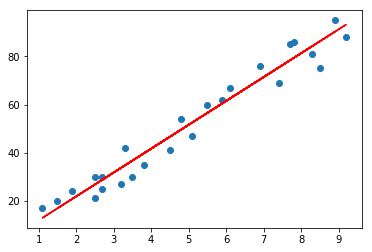

In [54]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()

### Evaluate the model 

Three evaluation metrics are commonly used:

* Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
* Mean Squared Error (MSE) is the mean of the squared errors
* Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


We can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

### References

* https://www.askpython.com/python/examples/linear-regression-in-python
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html